In [10]:
# EXPERIMENT 1: SAMPLING AND RECONSTRUCTION

# To study Sampling and Reconstruction of Bandlimited Signals, and observe the various possibilities of Sampling, 
# like Under Sampling (fs<2fm), Perfect Sampling (fs=2fm) and Oversampling (fs>2fm), 
# by choosing different Sampling Frequencies.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy import signal

In [12]:
# Let Nyquist Constant Q = fs/fm
# Undersampling: Q<2
# Perfect sampling: Q=2
# Oversampling: Q>2

# Bandlimited Signal
fm = 70  #Signal Frequency  
Q = 10   #Q>2
fs = Q*fm  #Sampling Frequency
T = 1/fm
t = np.arange(0, 5*T, 0.1*T)
ts = np.arange(0, 5*T, 1/fs)
x = np.cos(2*np.pi*fm*t)


In [1]:
# Bandlimited signal plotting.
plt.plot(t, x, label='Original Signal') 

# Sampling the Bandlimited signal
xs = np.cos(2 * np.pi * fm * ts)

# Plotting Sampled the Bandlimited signal
plt.stem(ts, xs, label='Sampled Signal', linefmt='r-', markerfmt='ro', basefmt='r-')

plt.title("Original and Sampled Bandlimited Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

Text(0, 0.5, 'Signal')

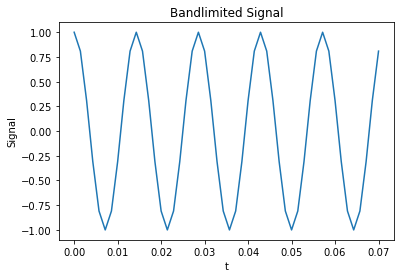

In [14]:
#Bandlimited signal plotting.
plt.plot(t,x) 
plt.title("Bandlimited Signal")
plt.xlabel("t")
plt.ylabel("Signal")

In [15]:
# Sampling the Bandlimited signal
xs=np.cos(2*np.pi*fm*ts)

Text(0, 0.5, 'Signal')

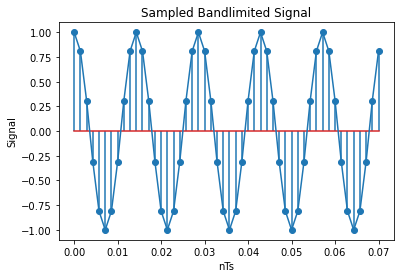

In [16]:
# Plotting Sampled the Bandlimited signal
plt.stem(ts,xs) 
plt.plot(t,x) 
plt.title("Sampled Bandlimited Signal")
plt.xlabel("nTs")
plt.ylabel("Signal")


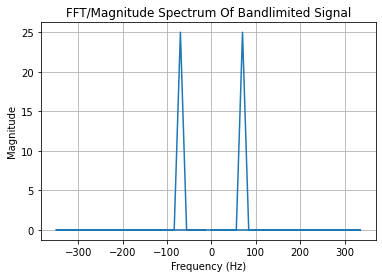

In [17]:
# FFT of Bandlimited Signal
xf = fft(xs)

# Plotting
freqs = np.fft.fftfreq(len(xf)) * fs  # Frequency axis
plt.plot(freqs, abs(xf))
plt.title("FFT/Magnitude Spectrum Of Bandlimited Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

In [18]:
wp=(fs/2)/fs #pass-band frequency
ws=(fs-10)/fs #stop-band frequency

apb=3 #pass-band attenuation in dB
asb=60 #stop-band attenuation in dB

[N, Wn]=signal.buttord(wp,ws,apb,asb) #determining order and cut-off frequency of lpf.
[b, a]=signal.butter(N,Wn,'low') #finding constants for lpf.
xr=signal.lfilter(b,a,xs) #bandlimited signal reconstruction.

Text(0, 0.5, 'Signal-->')

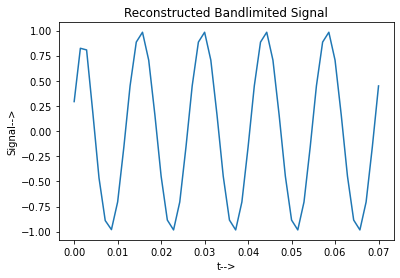

In [19]:
#Reconstructed bandlimited signal plotting.
plt.plot(t,xr) 
plt.title("Reconstructed Bandlimited Signal")
plt.xlabel("t-->")
plt.ylabel("Signal-->")

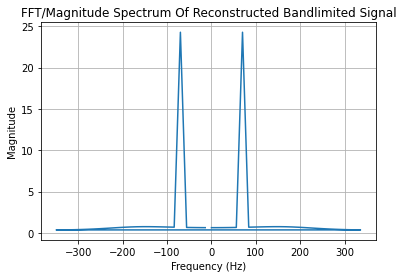

In [20]:
# FFT of Reconstructed bandlimited signal
xr_f = fft(xr)
# Plotting
freqsr = np.fft.fftfreq(len(xr_f)) * fs  # Frequency axis
plt.plot(freqsr, abs(xr_f))
plt.title("FFT/Magnitude Spectrum Of Reconstructed Bandlimited Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

In [21]:
# PASSBAND SIGNAL

In [27]:
# Case 1
Q_p=13 #minimum, Q=2, for Nyquist Criteria : fs>=2fmax.

f_p=100 #passband signal frequency in Hz.
A=1 #Amplitude of passband signal.
fc_p=1000 #carrier signal frequency in Hz.
Ac=2 #carrier signal amplitude.

fs_p=Q_p*(f_p+fc_p) #sampling frequency in Hz.

T_p=1/f_p #time period of passband signal in s.
Ts_p=1/fs_p #Sampling Time period in s.

t_p=np.arange(0,2*T_p,1*Ts_p) #time of passband signal in s.
ts_p=np.arange(0,2*T_p,1*Ts_p) #sampling time of passband signal in s.

x_p=A*np.cos(2*np.pi*f_p*t_p) #passband signal construction.
xc_p=Ac*np.cos(2*np.pi*fc_p*t_p) #carrier signal construction.
X_p=np.multiply(x_p,xc_p) #Resultant passband signal. (DSBSC)

Text(0, 0.5, 'Signal')

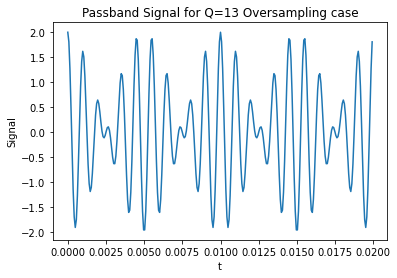

In [28]:
#passband signal plotting.
plt.plot(t_p,X_p) 
plt.title("Passband Signal for Q=13 Oversampling case")
plt.xlabel("t")
plt.ylabel("Signal")

In [29]:
# Sampling of passband signal
xs_p=A*np.cos(2*np.pi*f_p*ts_p) #sampled passband signal construction.
xc_s=Ac*np.cos(2*np.pi*fc_p*ts_p) #sampled carrier signal construction.
Xs_p=np.multiply(xs_p,xc_s) #Resultant sampled passband signal.

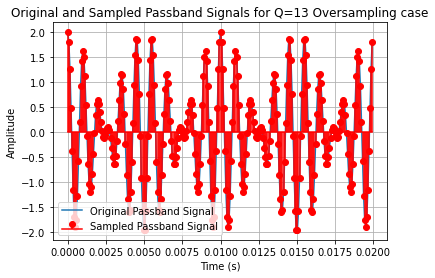

In [33]:
#sampled passband signal plotting. 
plt.plot(t_p, X_p, label='Original Passband Signal')
plt.stem(ts_p, Xs_p, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Passband Signal')
plt.title("Original and Sampled Passband Signals for Q=13 Oversampling case")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

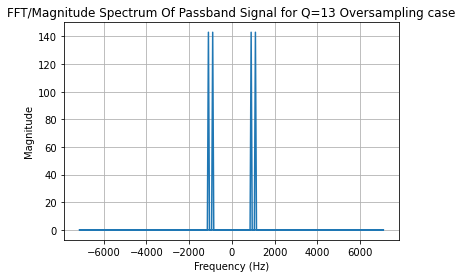

In [147]:
#FFT of passband signal.
X_fp = fft(Xs_p)

#plotting
freqs_p = np.fft.fftfreq(len(X_fp)) * fs_p  # Frequency axis
plt.plot(freqs_p, abs(X_fp))
plt.title("FFT/Magnitude Spectrum Of Passband Signal for Q=13 Oversampling case")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

In [148]:
wp_p=(fs_p/2)/fs_p #pass-band frequency
ws_p=(fs_p-10)/fs_p #stop-band frequency
apb_p=3 #pass-band attenuation in dB
asb_p=60 #stop-band attenuation in dB
[N, Wn_p]=signal.buttord(wp_p,ws_p,apb_p,asb_p) #determining order and cut-off frequency oflpf.
[b, a]=signal.butter(N,Wn_p,'low') #finding constants for lpf.
Xr_p=signal.lfilter(b,a,Xs_p) #passband signal reconstruction.

Text(0, 0.5, 'Signal')

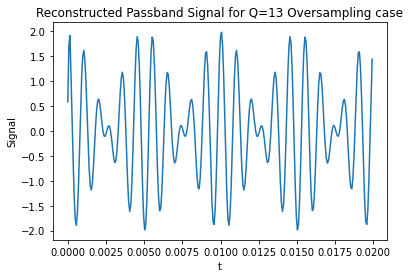

In [149]:
#Reconstructed passband signal plotting.
plt.plot(t_p,Xr_p) 
plt.title("Reconstructed Passband Signal for Q=13 Oversampling case")
plt.xlabel("t")
plt.ylabel("Signal")


In [34]:
#Case 2
Q_p = 1.5  # fs<2fmax.
f_p = 100  
A = 1  
fc_p = 1000 
Ac = 2  

# Correct calculation of sampling frequency
fs_p = 2 * Q_p * (f_p + fc_p)

T_p = 1 / f_p  
Ts_p = 1 / fs_p  

t_p = np.arange(0, 2 * T_p, Ts_p)  
x_p = A * np.cos(2 * np.pi * f_p * t_p)  
xc_p = Ac * np.cos(2 * np.pi * fc_p * t_p) 
X_p = np.multiply(x_p, xc_p)  


Text(0, 0.5, 'Signal')

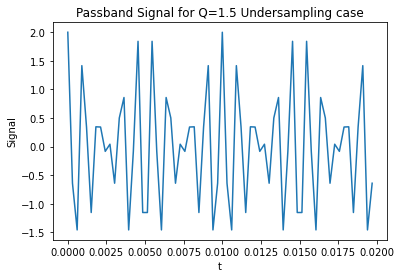

In [35]:
#passband signal plotting.
plt.plot(t_p,X_p) 
plt.title("Passband Signal for Q=1.5 Undersampling case")
plt.xlabel("t")
plt.ylabel("Signal")

In [36]:
# Sampling of passband signal
ts_p = np.arange(0, 2 * T_p, Ts_p)  
xs_p = A * np.cos(2 * np.pi * f_p * ts_p)  
xc_s = Ac * np.cos(2 * np.pi * fc_p * ts_p)  
Xs_p = np.multiply(xs_p, xc_s)  

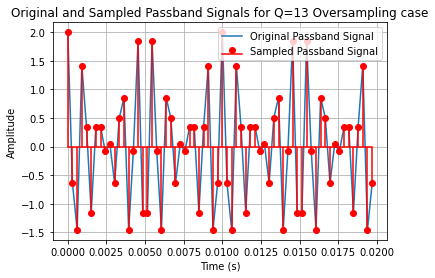

In [37]:
#sampled passband signal plotting. 
plt.plot(t_p, X_p, label='Original Passband Signal')
plt.stem(ts_p, Xs_p, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Passband Signal')
plt.title("Original and Sampled Passband Signals for Q=13 Oversampling case")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

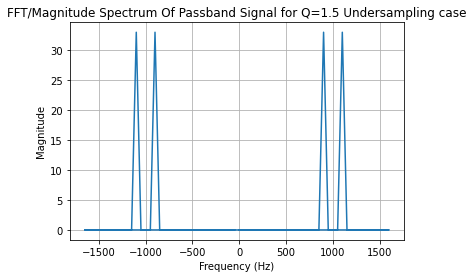

In [154]:
# FFT of original passband signal
X_fp = fft(X_p)

# Frequency axis for plotting FFT
freqs_p = np.fft.fftfreq(len(X_fp), d=1/fs_p)  # Frequency axis

# Plotting
plt.plot(freqs_p, abs(X_fp))
plt.title("FFT/Magnitude Spectrum Of Passband Signal for Q=1.5 Undersampling case")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


In [155]:
wp_p=(fs_p/2)/fs_p 
ws_p=(fs_p-10)/fs_p 
apb_p=3 
asb_p=60 
[N, Wn_p]=signal.buttord(wp_p,ws_p,apb_p,asb_p) 
[b, a]=signal.butter(N,Wn_p,'low') 
Xr_p=signal.lfilter(b,a,Xs_p) 

Text(0, 0.5, 'Signal')

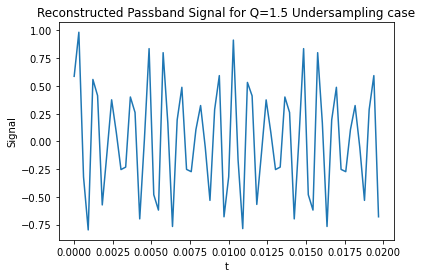

In [156]:
#Reconstructed passband signal plotting.
plt.plot(t_p,Xr_p) 
plt.title("Reconstructed Passband Signal for Q=1.5 Undersampling case")
plt.xlabel("t")
plt.ylabel("Signal")

In [38]:
# Case 3
Q_p=2 # fs=2fmax.
f_p = 100  
A = 1  
fc_p = 1000  
Ac = 2  

# Correct calculation of sampling frequency
fs_p = 2 * Q_p * (f_p + fc_p)

T_p = 1 / f_p  
Ts_p = 1 / fs_p  

t_p = np.arange(0, 2 * T_p, Ts_p) 
x_p = A * np.cos(2 * np.pi * f_p * t_p)  
xc_p = Ac * np.cos(2 * np.pi * fc_p * t_p)  
X_p = np.multiply(x_p, xc_p)  

Text(0, 0.5, 'Signal')

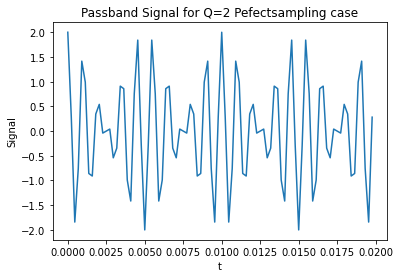

In [39]:
#passband signal plotting.
plt.plot(t_p,X_p) 
plt.title("Passband Signal for Q=2 Pefectsampling case")
plt.xlabel("t")
plt.ylabel("Signal")

In [40]:
# Sampling of passband signal
ts_p = np.arange(0, 2 * T_p, Ts_p)  
xs_p = A * np.cos(2 * np.pi * f_p * ts_p)  
xc_s = Ac * np.cos(2 * np.pi * fc_p * ts_p)  
Xs_p = np.multiply(xs_p, xc_s)  

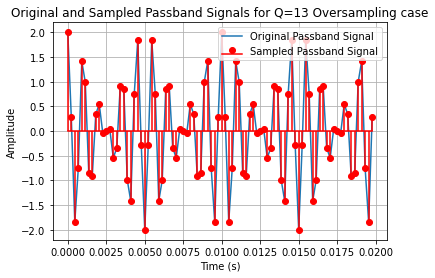

In [41]:
#sampled passband signal plotting. 
plt.plot(t_p, X_p, label='Original Passband Signal')
plt.stem(ts_p, Xs_p, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Passband Signal')
plt.title("Original and Sampled Passband Signals for Q=13 Oversampling case")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

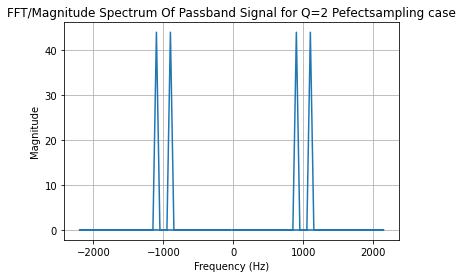

In [42]:
# FFT of original passband signal
X_fp = fft(X_p)

# Frequency axis for plotting FFT
freqs_p = np.fft.fftfreq(len(X_fp), d=1/fs_p)  # Frequency axis

# Plotting
plt.plot(freqs_p, abs(X_fp))
plt.title("FFT/Magnitude Spectrum Of Passband Signal for Q=2 Pefectsampling case")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

In [43]:
wp_p=(fs_p/2)/fs_p 
ws_p=(fs_p-10)/fs_p 
apb_p=3 
asb_p=60 
[N, Wn_p]=signal.buttord(wp_p,ws_p,apb_p,asb_p) 
[b, a]=signal.butter(N,Wn_p,'low') 
Xr_p=signal.lfilter(b,a,Xs_p) 

Text(0, 0.5, 'Signal')

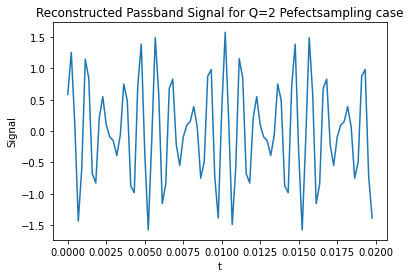

In [44]:
#Reconstructed passband signal plotting.
plt.plot(t_p,Xr_p) 
plt.title("Reconstructed Passband Signal for Q=2 Pefectsampling case")
plt.xlabel("t")
plt.ylabel("Signal")

Upon analyzing the simulation results and corresponding output graphs, several key
observations emerge regarding the sampling and reconstruction of both
baseband/bandlimited signals and passband signals:
(i) Oversampling: When the sampling frequency (fs) exceeds twice the maximum
frequency (fmax) of the signal (fs > 2 x fmax ) oversampling occurs. In this scenario ,
signal reconstruction can be achieved accurately with minimal error.
(ii) Prefect Sampling: If the sampling frequency is exactly twice the maximum frequency
of the signal (fs = 2 x fmax ) , perfect sampling is achieved. However , despite meeting
the perfect sampling condition , signal reconstruction might be somewhat challenging ,
introducing the possibility of errors.
(iii) Undersampling: When the sampling frequency falls below twice the maximum
frequency of the signal (fs < 2 x fmax ) undersampling occurs. In this case , signal
reconstruction becomes impractical , leading to a high chance of significant errors.
